# Домашнее задание № 2. Градиентный спуск

In [1]:
import numpy as np
import pandas as pd

import methods
import oracles
import matplotlib.pyplot as plt

from collections import defaultdict
from plot_trajectory_2d import plot_levels, plot_trajectory

In [2]:
plt.rcParams["figure.figsize"] = (16, 8)

# Траектория градиентного спуска на квадратичной функции

Задайте две-три двумерные квадратичные функции с разными числами обусловленности. Запустите на них GD с различными стратегиями выбора шага, изобразите на графиках траектории методов и линии уровня функции. Для рисования линий уровня воспользуйтесь функцией `plot_trajectory`, а для траекторий методов – функцией `plot_levels` из файла
`plot_trajectory_2d`.

Для начала воспользуемся указаниями из пункта 1.4 описания ДЗ по генерации случайной функции.

In [3]:
orth = lambda phi: np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])

In [4]:
S = orth(1.5)

Для анализа траектории создадим 3 функции с $k = 5, 10, 100$:

In [5]:
matrices_dict = {}
for k in [5, 10, 100]:
    A = np.diag([1, k])
    matrix = S.dot(A).dot(S.T)
    print(f"Matrix with conditional number {k} is:")
    print(matrix)
    matrices_dict[k] = matrix

Matrix with conditional number 5 is:
[[4.97998499 0.28224002]
 [0.28224002 1.02001501]]
Matrix with conditional number 10 is:
[[9.95496623 0.63504004]
 [0.63504004 1.04503377]]
Matrix with conditional number 100 is:
[[99.50462858  6.9854404 ]
 [ 6.9854404   1.49537142]]


**Постарайтесь ответить на вопрос:** как зависит поведение методов от числа обусловленности, от начальной точки, от стратегии выбора длины шага?

Чтобы ответить на эти вопросы, для каждого числа обусловленности будем генерировать 20 случайных стартовых точек, и затем запускать градиентный спуск с тремя стратегиями выбора шага, занося полученные данные в таблицу, чтобы потом было удобнее сравнивать. Также, будем для примера отрисовывать траекторию каждого метода для каждой последней точки. Также, для константного метода вручную изменим размер шага на 0.1, иначе уже при k=10 он совсем перестанет сходиться.

In [6]:
ful_res_dict = defaultdict(dict)

### k = 5

In [62]:
k = 5
small_res_dict = defaultdict(dict)
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['x_coord'] = start_point[0]
    ful_res_dict[k][i]['y_coord'] = start_point[1]
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method, 
                                                                              'c': 0.1})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i][f'x_final_point_{method}'] = gd.hist['x_star'][0]
        ful_res_dict[k][i][f'y_final_point_{method}'] = gd.hist['x_star'][1]
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

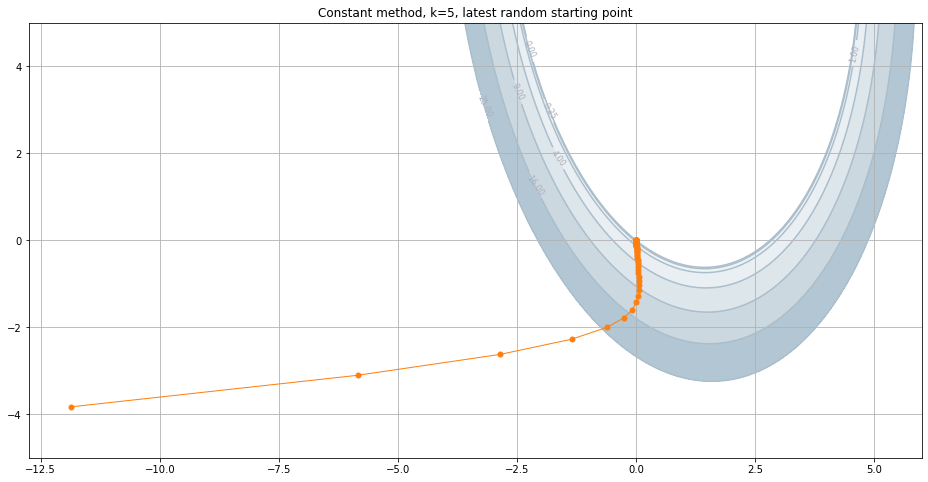

In [63]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

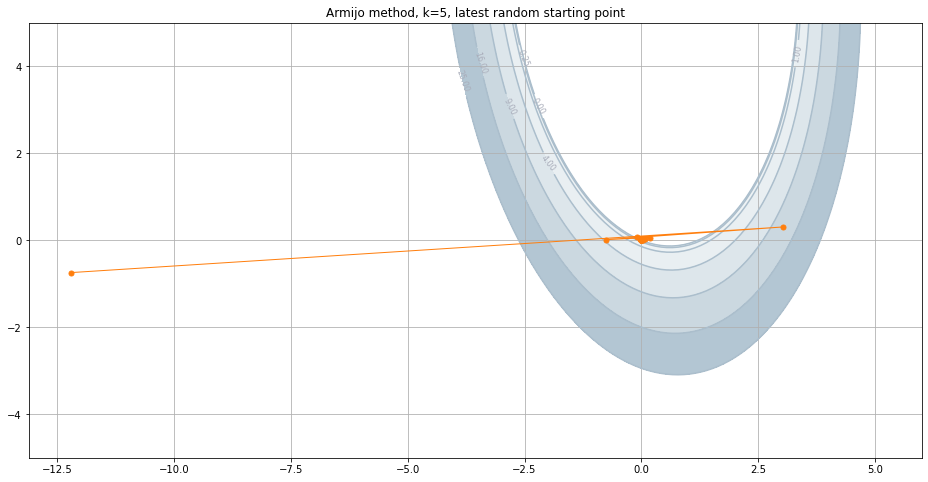

In [9]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

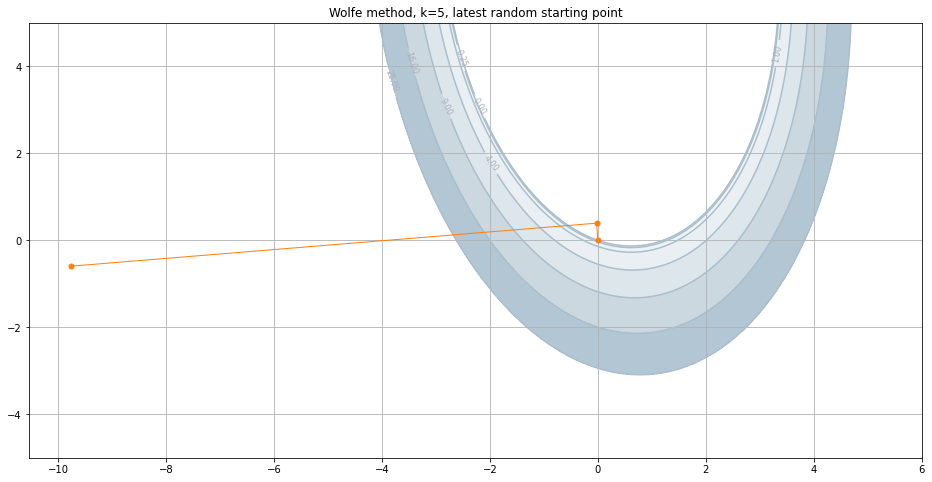

In [10]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

### k = 10

In [64]:
k = 10
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['x_coord'] = start_point[0]
    ful_res_dict[k][i]['y_coord'] = start_point[1]
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method,
                                                                              'c': 0.1})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i][f'x_final_point_{method}'] = gd.hist['x_star'][0]
        ful_res_dict[k][i][f'y_final_point_{method}'] = gd.hist['x_star'][1]
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

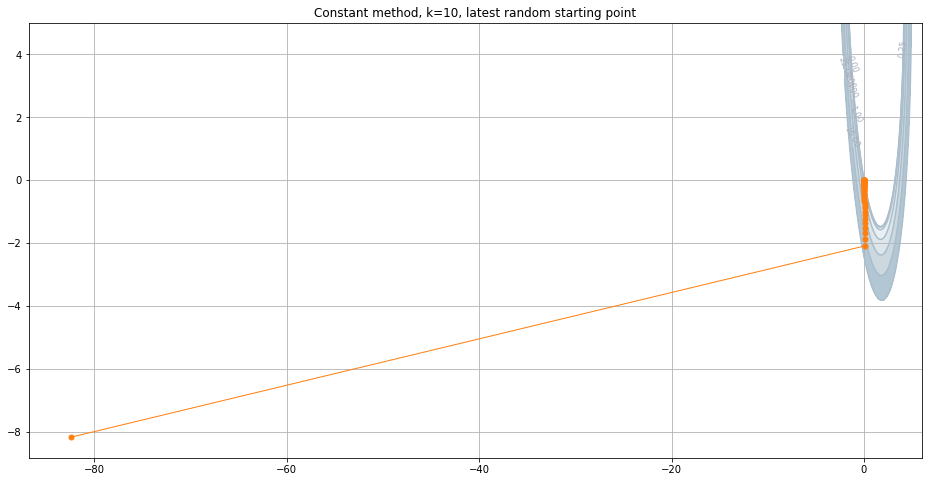

In [65]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

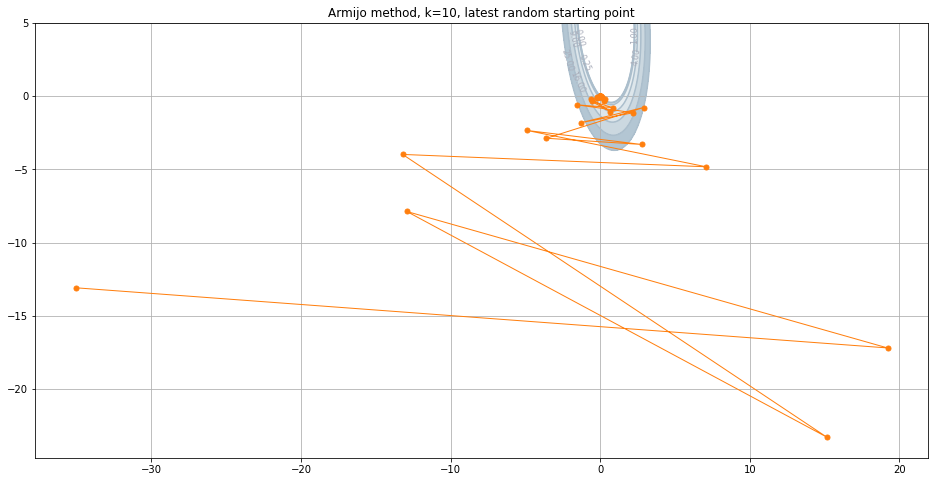

In [16]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

 В примере выше видно, что хоть выбор стартовой точки не влияет на сходимость, в случае плохого выбора привозит к зигзагообразной траектории

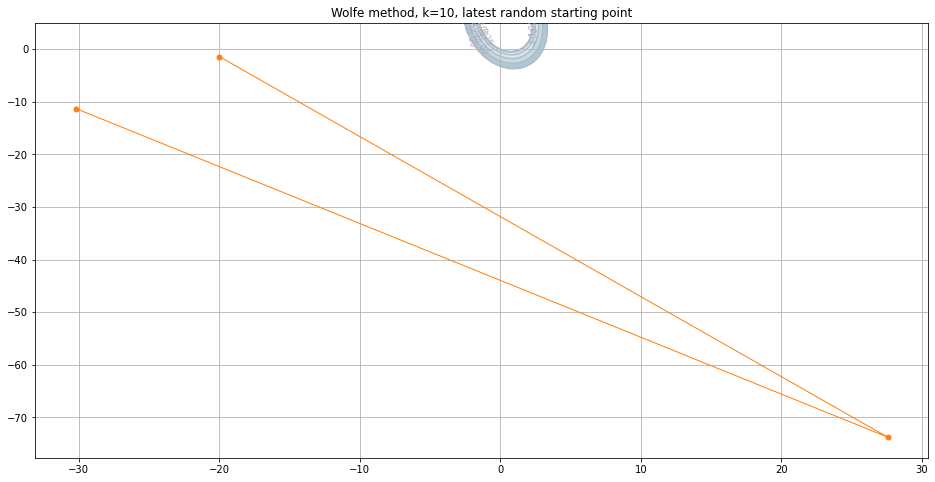

In [17]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

### k = 100

In [66]:
k = 100
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['x_coord'] = start_point[0]
    ful_res_dict[k][i]['y_coord'] = start_point[1]
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method,
                                                                              'c': 0.1})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i][f'x_final_point_{method}'] = gd.hist['x_star'][0]
        ful_res_dict[k][i][f'y_final_point_{method}'] = gd.hist['x_star'][1]
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

/Users/ivant/travail/made_opt_in_ml/homework_2/methods.py:168: RuntimeWarning: invalid value encountered in subtract
  x_k = x_k - alpha * grad_x_k
/Users/ivant/travail/made_opt_in_ml/homework_2/oracles.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / 2 * x.T.dot(self.A).dot(x) - self.b.T.dot(x)


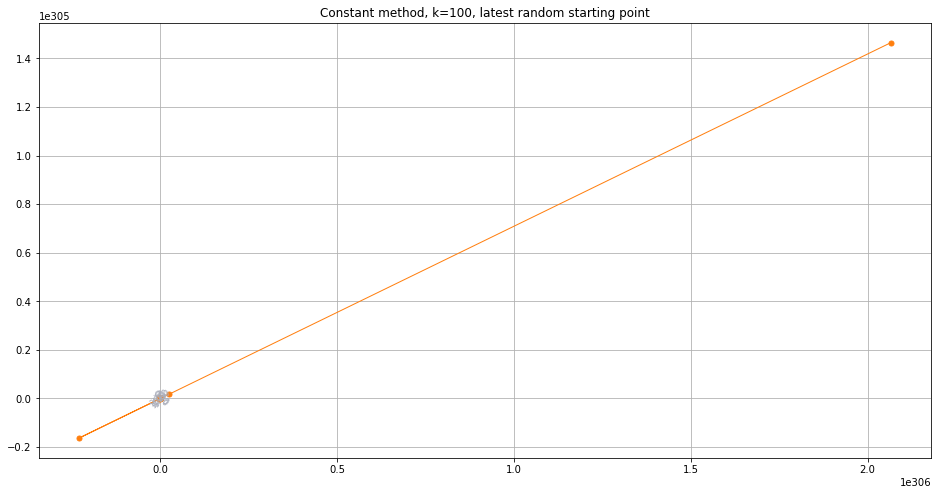

In [67]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

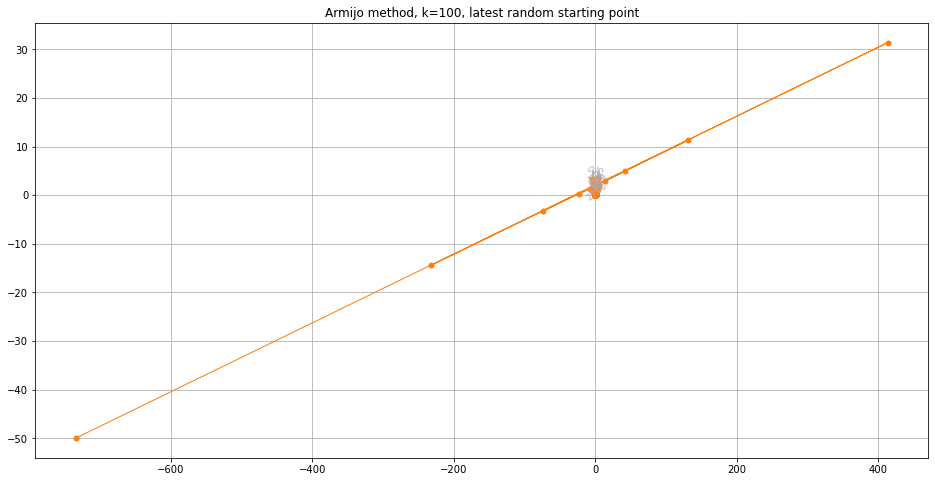

In [20]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

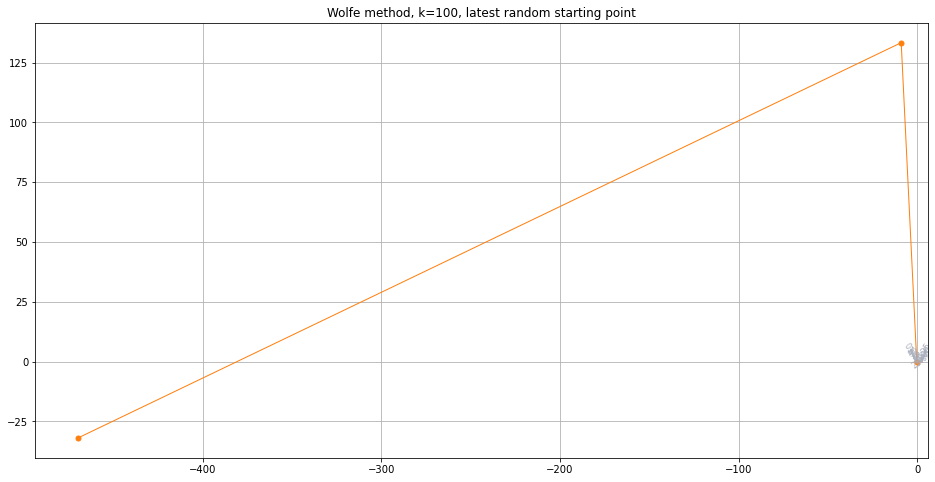

In [21]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

## Сравнение методов

Постарайтесь ответить на вопрос: как зависит поведение методов от числа обусловленности, от начальной точки, от стратегии выбора длины шага?

### Выбор начальной точки

Для ответа на вопрос, зависит ли поведение метода от выбора начальной точки, покажем расположение всех начальных точек на плоскости (например для $k = 5$) и положение точки-ответа.

In [68]:
df = pd.DataFrame(ful_res_dict[5]).T

In [69]:
df.head()

,x_coord,y_coord,Constant,x_final_point_Constant,y_final_point_Constant,Armijo,x_final_point_Armijo,y_final_point_Armijo,Wolfe,x_final_point_Wolfe,y_final_point_Wolfe
0,11.0,49.0,104.0,0.976387,7.573546,24.0,0.976515,7.573160,25.0,0.976355,7.573253
1,23.0,44.0,97.0,0.976347,7.574104,23.0,0.976273,7.573368,3.0,0.976437,7.572840
2,32.0,42.0,94.0,0.976323,7.574443,23.0,0.976230,7.573324,3.0,0.976437,7.572840
3,30.0,21.0,85.0,0.976333,7.574299,22.0,0.976515,7.573197,3.0,0.976437,7.572840
4,16.0,30.0,97.0,0.976382,7.573614,23.0,0.976328,7.573163,3.0,0.976437,7.572840


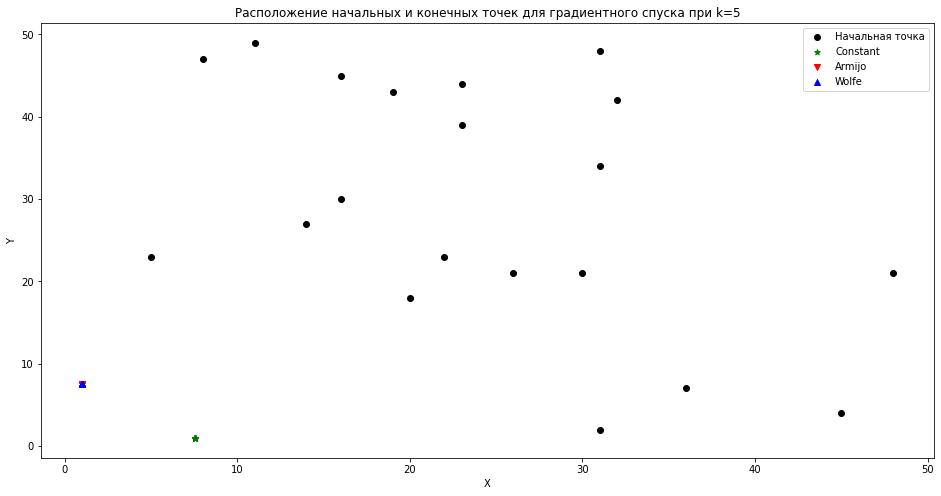

In [81]:
plt.scatter(df['x_coord'], df['y_coord'], c='black', label='Начальная точка')
plt.scatter(df['y_final_point_Constant'], df['x_final_point_Constant'], c='green',
            marker='*', label='Constant')
plt.scatter(df['x_final_point_Armijo'], df['y_final_point_Armijo'], c='red',
            marker='v', label='Armijo')
plt.scatter(df['x_final_point_Wolfe'], df['y_final_point_Wolfe'], c='blue',
            marker='^', label='Wolfe')
plt.title("Расположение начальных и конечных точек для градиентного спуска при k=5")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

Есть подозрение, что константный метод не успел сойтись за 500 итерацийй, но в целом можно сделать вывод, что выбор начальной точки не влияет на результат работы градиентного спуска.

### Число обусловленности и стратегия выбора шага

In [72]:
k_iteration = {'Constant': [], 'Armijo': [], 'Wolfe': []}

for k, results in ful_res_dict.items():
    k_iteration['Constant'].append(np.mean([point['Constant']for point in results.values()]))
    k_iteration['Armijo'].append(np.mean([point['Armijo']for point in results.values()]))
    k_iteration['Wolfe'].append(np.mean([point['Wolfe']for point in results.values()]))

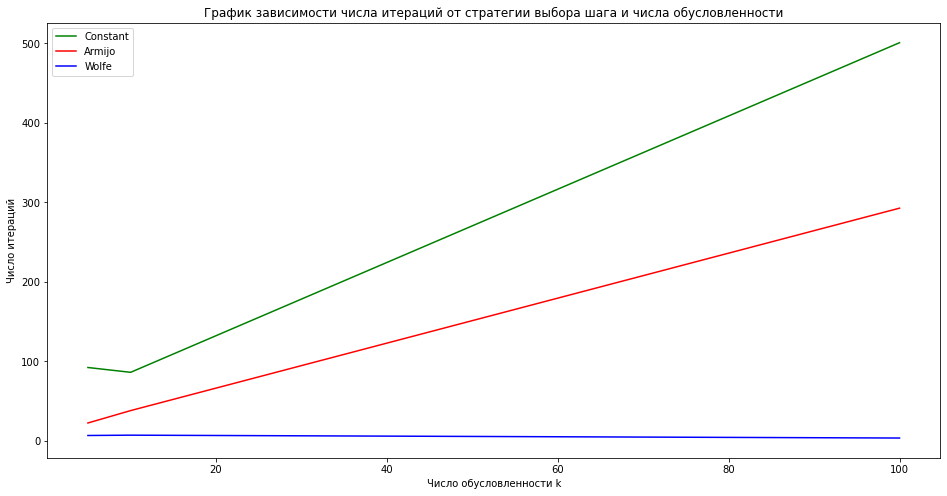

In [80]:
plt.plot(ful_res_dict.keys(), k_iteration['Constant'], label='Constant', c='green')
plt.plot(ful_res_dict.keys(), k_iteration['Armijo'], label='Armijo', c='red')
plt.plot(ful_res_dict.keys(), k_iteration['Wolfe'], label='Wolfe', c='blue')
plt.title("График зависимости числа итераций от стратегии выбора шага и числа обусловленности")
plt.xlabel("Число обусловленности k")
plt.ylabel("Число итераций")
plt.legend();

Видно, что поведение градиентного спуска зависит от числа обусловленности, и в определенной мере от выбранной стратегии подбора шага - определенно алгоритм Вульфа справляется с подбором шага лучше остальных.

# Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое GD для сходимости, от

• Числа обусловленности целевой функции κ;

• Размерности пространства n.

воспользуемся методом, описанным в пункте 1.4

In [74]:
def get_random_matrix(n, k):
    diag = [1]
    for i in range(n - 2):
        diag.append(np.random.random() * (k - 1) + 1)
    diag.append(k)
    return np.diag(diag)


Будем изучать следующие значения $ n = 10, 100, 1000, 10000$ при k от 5 до 50, с шагом 5.

In [75]:
n_list = [10, 100, 1000, 10000]
k_list = np.arange(5, 51, 5)
n_samples = 20

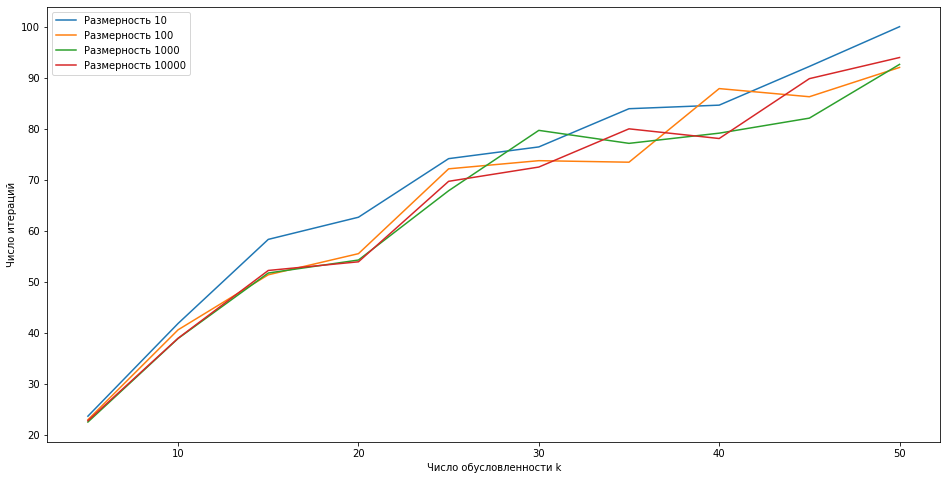

In [76]:
for n in n_list:
    iterations = []
    for k in k_list:
        curr_samples = []
        for sample in range(n_samples):
            curr_matrix = get_random_matrix(n, k)
            curr_b = np.random.random(n)
            starting_point = np.random.random(n)
            oracle = oracles.QuadraticOracle(curr_matrix, curr_b)
            gd = methods.GradientDescent(oracle, starting_point,
                                         line_search_options={'method': 'Wolfe'})
            gd.run()
            curr_samples.append(len(gd.hist["func"]))
        iterations.append(np.mean(curr_samples))
    plt.plot(k_list, iterations, label=f"Размерность {n}")
plt.xlabel("Число обусловленности k")
plt.ylabel("Число итераций")
plt.legend()


Наблюдаем линейную зависимость числа итераций от числа обусловленности, что хорошо согласуется с теоретическими оценками. 